# 3.  Codificación de variables

Conjunto de datos: titanic (incluido en seaborn)

Este conjunto de datos es excelente para trabajar con variables categóricas.

In [1]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [3]:
# Cargar el conjunto de datos
data = sns.load_dataset('titanic')

In [4]:
# Visualizar las primeras filas
print("Conjunto de datos Titanic:")
data.head()

Conjunto de datos Titanic:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# Seleccionar columnas categóricas
categorical_cols = ['sex', 'embarked', 'class']

In [6]:
# Codificar con LabelEncoder
label_encoder = LabelEncoder()
data['sex_label'] = label_encoder.fit_transform(data['sex'])

In [7]:
# Codificar con OneHotEncoder
onehot_encoder = pd.get_dummies(data['embarked'], prefix='embarked')

In [8]:
# Combinar con el conjunto original
data = pd.concat([data, onehot_encoder], axis=1)

# Ejercicios
Contesta las siguientes preguntas. Para cada pregunta, deberás escribir código que demostrará cómo llegaste al resultado. Crea gráficas en donde veas correcto.

### 1. ¿Qué diferencias encuentras entre LabelEncoder y OneHotEncoder?

In [9]:
# Mostrar LabelEncoder
print("LabelEncoder para 'sex':")
print(data[['sex', 'sex_label']].head(10))

# Mostrar OneHotEncoder
print("\nOneHotEncoder para 'embarked':")
onehot_cols = [col for col in data.columns if 'embarked_' in col]
print(data[['embarked'] + onehot_cols].head(10))


LabelEncoder para 'sex':
      sex  sex_label
0    male          1
1  female          0
2  female          0
3  female          0
4    male          1
5    male          1
6    male          1
7    male          1
8  female          0
9  female          0

OneHotEncoder para 'embarked':
  embarked  embarked_C  embarked_Q  embarked_S
0        S       False       False        True
1        C        True       False       False
2        S       False       False        True
3        S       False       False        True
4        S       False       False        True
5        Q       False        True       False
6        S       False       False        True
7        S       False       False        True
8        S       False       False        True
9        C        True       False       False


### 2. Crea una gráfica de barras comparando las frecuencias de 'sex' antes y después de la codificación con LabelEncoder.

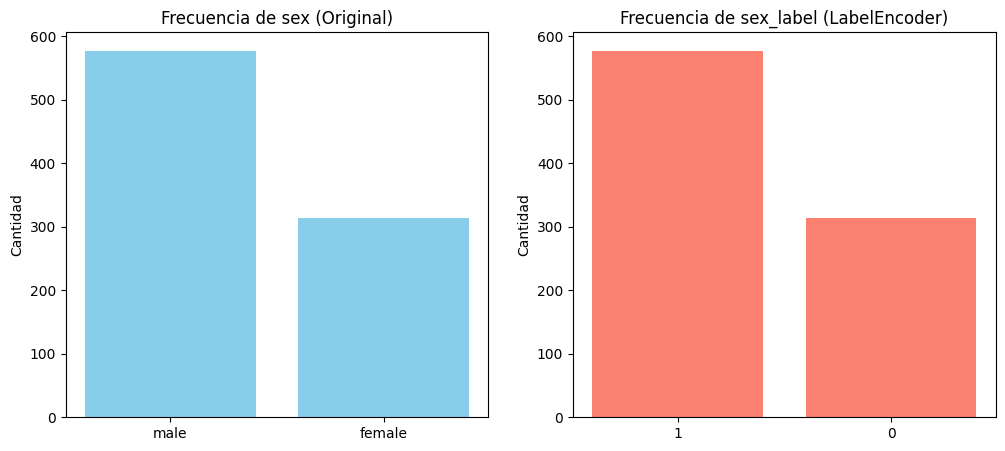

In [10]:
import matplotlib.pyplot as plt

# Contar frecuencias
original_counts = data['sex'].value_counts()
encoded_counts = data['sex_label'].value_counts()

# Crear la gráfica
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Antes de la codificación
axes[0].bar(original_counts.index, original_counts.values, color='skyblue')
axes[0].set_title('Frecuencia de sex (Original)')
axes[0].set_ylabel('Cantidad')

# Después de LabelEncoder
axes[1].bar(encoded_counts.index.astype(str), encoded_counts.values, color='salmon')
axes[1].set_title('Frecuencia de sex_label (LabelEncoder)')
axes[1].set_ylabel('Cantidad')

plt.show()


### 3. Utiliza OneHotEncoder para codificar la columna 'class'. ¿Qué ventajas tiene este enfoque frente a LabelEncoder?

In [11]:
# Codificación OneHot para la columna 'class'
onehot_class = pd.get_dummies(data['class'], prefix='class')

# Combinar con el DataFrame original
data = pd.concat([data, onehot_class], axis=1)

# Mostrar primeras filas
data[['class'] + list(onehot_class.columns)].head(10)


,class,class_First,class_Second,class_Third
0,Third,False,False,True
1,First,True,False,False
2,Third,False,False,True
3,First,True,False,False
4,Third,False,False,True
5,Third,False,False,True
6,First,True,False,False
7,Third,False,False,True
8,Third,False,False,True
9,Second,False,True,False


### 4. Si quisieras aplicar un modelo de aprendizaje automático, ¿qué tipo de codificación elegirías para las variables categóricas? Explica tu respuesta.

In [ ]:
Para un modelo de aprendizaje automático, elegiría OneHotEncoder para las variables categóricas nominales (como `sex`, `class`, `embarked`), porque:

Evita que el modelo interprete un orden inexistente,
Cada categoría se representa como una columna independiente,
Mejora la precisión y evita sesgos introducidos por números arbitrarios de LabelEncoder.

Si la variable fuera ordinal (con un orden natural, por ejemplo “bajo, medio, alto”), ahí sí usaría LabelEncoder.


# Seleccionar columnas categóricas
categorical_cols = ['sex', 'embarked', 'class']

# Aplicar OneHotEncoder usando get_dummies
data_encoded = pd.get_dummies(data, columns=categorical_cols, prefix=categorical_cols)

# Mostrar primeras filas
data_encoded.head(10)

,survived,pclass,age,sibsp,parch,fare,who,adult_male,deck,embark_town,...,class_Second,class_Third,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third
0,0,3,22.0,1,0,7.2500,man,True,NaN,Southampton,...,False,True,False,True,False,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,woman,False,C,Cherbourg,...,False,False,True,False,True,False,False,True,False,False
2,1,3,26.0,0,0,7.9250,woman,False,NaN,Southampton,...,False,True,True,False,False,False,True,False,False,True
3,1,1,35.0,1,0,53.1000,woman,False,C,Southampton,...,False,False,True,False,False,False,True,True,False,False
4,0,3,35.0,0,0,8.0500,man,True,NaN,Southampton,...,False,True,False,True,False,False,True,False,False,True
5,0,3,NaN,0,0,8.4583,man,True,NaN,Queenstown,...,False,True,False,True,False,True,False,False,False,True
6,0,1,54.0,0,0,51.8625,man,True,E,Southampton,...,False,False,False,True,False,False,True,True,False,False
7,0,3,2.0,3,1,21.0750,child,False,NaN,Southampton,...,False,True,False,True,False,False,True,False,False,True
8,1,3,27.0,0,2,11.1333,woman,False,NaN,Southampton,...,False,True,True,False,False,False,True,False,False,True
9,1,2,14.0,1,0,30.0708,child,False,NaN,Cherbourg,...,True,False,True,False,True,False,False,False,True,False
